<a href="https://colab.research.google.com/github/CamelGoong/Pandas_Practicing/blob/main/PART_3_Skimming_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 데이터프레임의 구조

1-1 데이터 내용 미리보기

In [14]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이썬 머신러닝 판다스 데이터 분석/data/part3/auto-mpg.csv", header = None)

# 열 이름 별도 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


1-2 데이터 요약 정보 확인하기

In [15]:
df.shape

(398, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
# 각 열의 자료형 확인
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


In [20]:
# 기술통계정보 요약
df.describe(include = "all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


1-3 데이터 갯수 확인

In [21]:
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64

In [24]:
# 고유값 갯수
unique_values = df['origin'].value_counts()

#2 통계함수 적용

2-1 평균값

In [27]:
df[['mpg', 'weight']].mean()

mpg         23.514573
weight    2970.424623
dtype: float64

2-2 중간값

In [29]:
df['mpg'].median()

23.0

2-3 최대값

In [30]:
df.max()

mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                     ?
weight                    5140.0
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object

2-4 최소값

In [32]:
df['mpg'].min()

9.0

2-5 표준편차

In [33]:
df['mpg'].std()

7.815984312565782

2-6 상관계수

In [34]:
df[['mpg', 'weight']].corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


#3 판다스 내장 그래프 도구 활용

데이터프레임 객체에 **plot()** 메소드를 적용하여 그래프를 그리고, **kind** 옵션으로 그래프의 종류를 선택

In [8]:
# 1) 선 그래프
#!pip install openpyxl
import pandas as pd 

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이썬 머신러닝 판다스 데이터 분석/data/part3/남북한발전전력량.csv")

df_ns = df.iloc[[0,5], 3:]
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형으로 변경
print(df_ns.head())
df_ns.head()

        1991   1992   1993   1994   1995  ...   2012   2013   2014   2015   2016
South  1,186  1,310  1,444  1,650  1,847  ...  5,096  5,171  5,220  5,281  5,404
North    263    247    221    231    230  ...    215    221    216    190    239

[2 rows x 26 columns]


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,"1,186","1,310","1,444","1,650","1,847","2,055","2,244","2,153","2,393","2,664","2,852","3,065","3,225","3,421","3,646","3,812","4,031","4,224","4,336","4,747","4,969","5,096","5,171","5,220","5,281","5,404"
North,263,247,221,231,230,213,193,170,186,194,202,190,196,206,215,225,236,255,235,237,211,215,221,216,190,239


In [10]:
tdf_ns = df_ns.T # 행렬 전치
tdf_ns.plot()

TypeError: ignored

In [14]:
# 2) 막대 그래프
import pandas as pd
df_ns = df.iloc[[0, 5], 3:]            # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']        # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) # 열 이름의 자료형을 정수형으로 변경

# 행, 열 전치하여 막대 그래프 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')
tdf_ns.plot(kind='bar')

      South North
1991  1,186   263
1992  1,310   247
1993  1,444   221
1994  1,650   231
1995  1,847   230




TypeError: ignored

In [15]:
# 3) 히스토그램
tdf_ns.plot(kind = 'hist')

TypeError: ignored

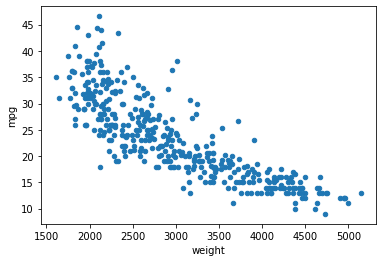

In [17]:
# 4) 산점도
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이썬 머신러닝 판다스 데이터 분석/data/part3/auto-mpg.csv")
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
df.plot(x = 'weight', y = 'mpg', kind = 'scatter')

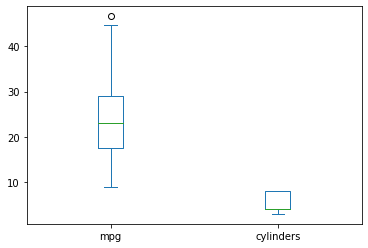

In [19]:
# 5) 박스플롯
df[['mpg', 'cylinders']].plot(kind = 'box')